# Reinforcement learning
## Upper confidence bound

<b>Reinforcement learning for robotics: Reward and punishment approach</b>

###  MultiArm Bandit problem

The casino machines, with different distributions.<br>
<i>How to bet with maximum returns.For this we use Exploration with Exploitation to find the best distribution.</i><br>
Exploration and regret.<br>
This is applied for the advertising campaigns.<br>
A/B tests are used to determine the best ones.But for this we will be doing Exploration and Exploitation separately and this can be time consuming which means we will be spending more time on the ones we lose.
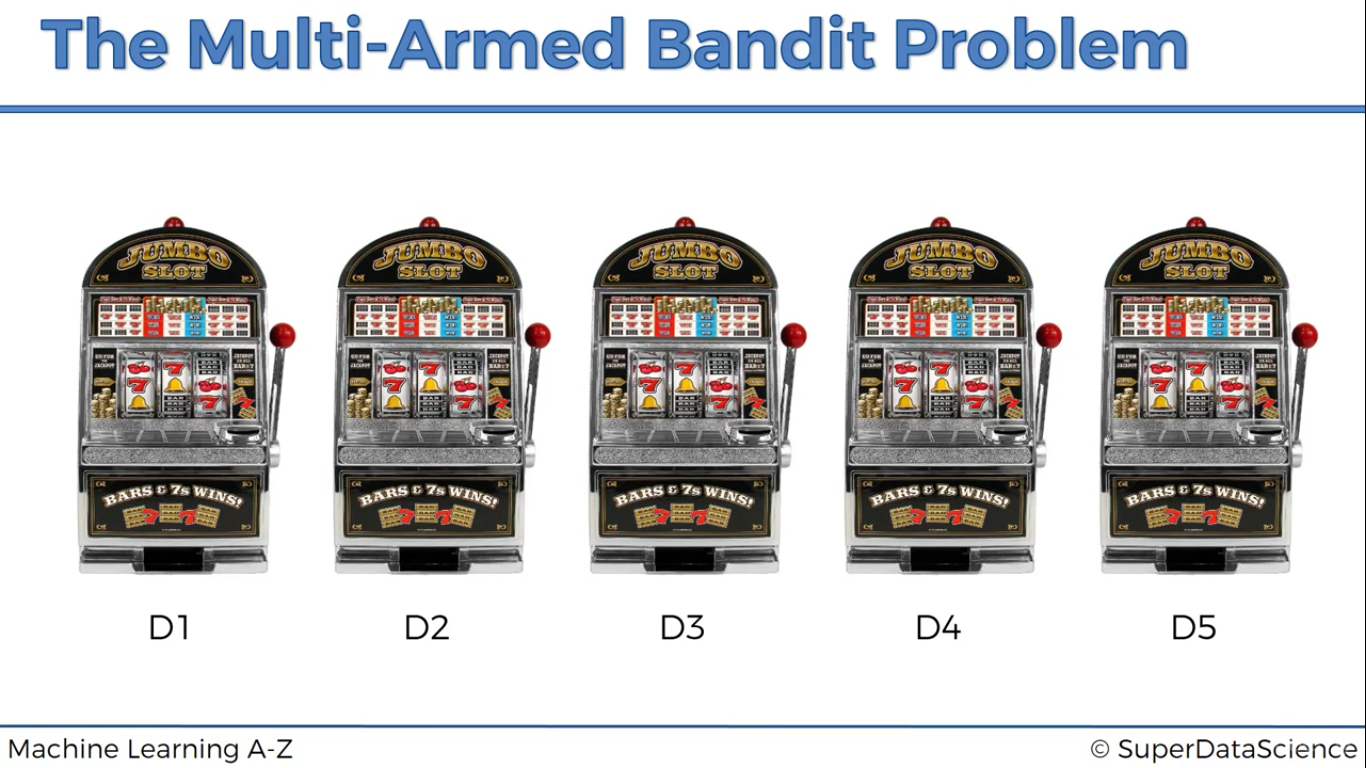

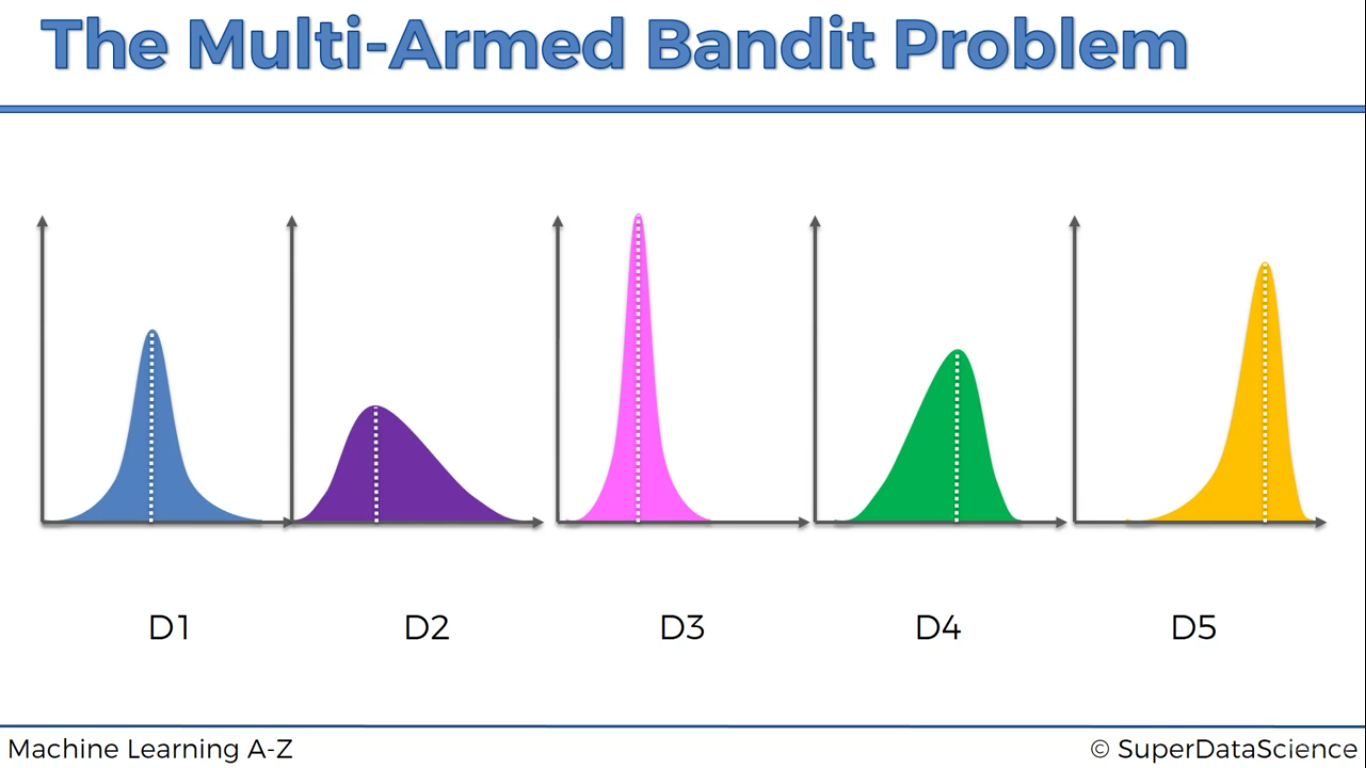


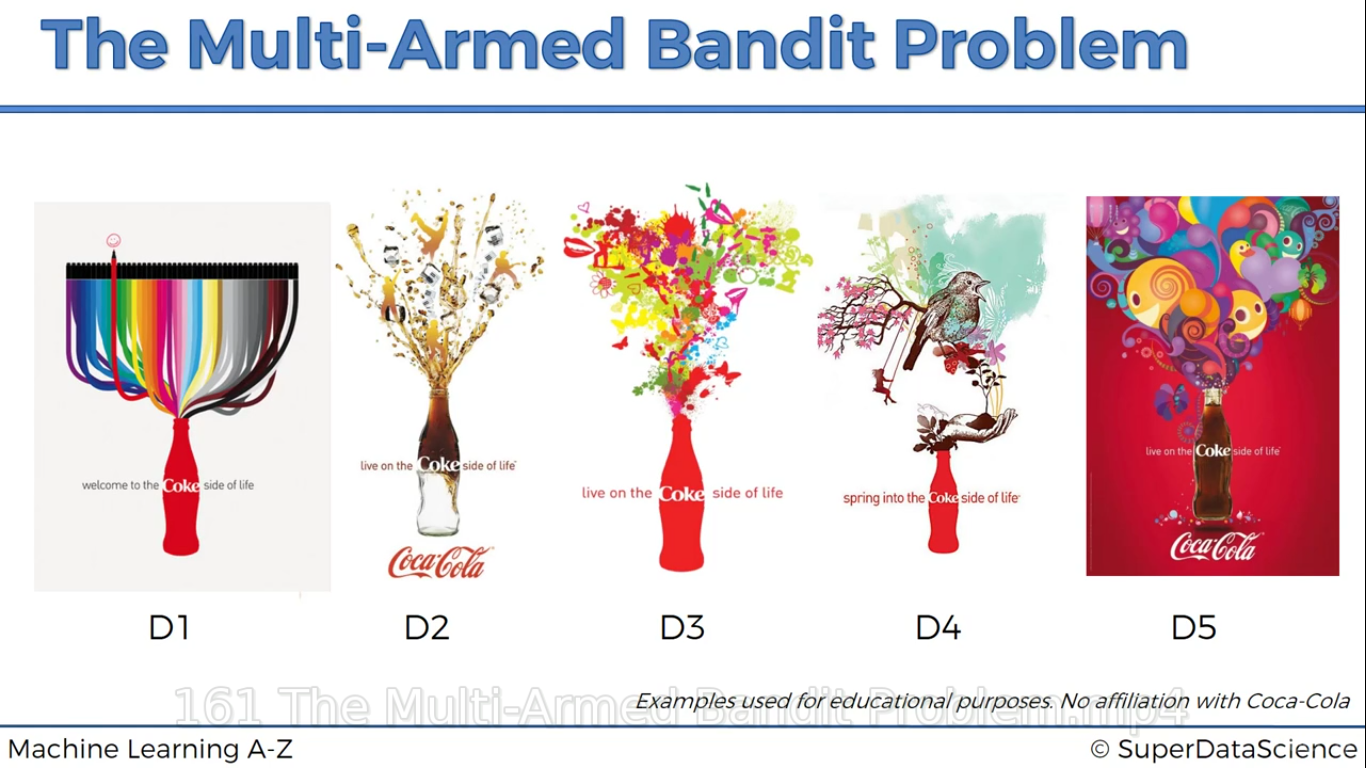

## Upper Confidence Bound
To Combine Exploration and Exploitation to maximize our returns for our efforts. <br>
1. we assume the starting value for returns.
2. Now with some experiments,the trial runs we come up with the confidence bounds(Expected value will fall in the confidence bound for sure.)
3. We pick the random one and then if the output is correct.. we increase the expected value and increase the confidence bound and do the opposite for the ones the -ve output confidence bound decreases in both cases as we become more and more confident for with observations.
4. we keep on repeating till the end of iterations (The availabe dataset.)
5. The one with the highest returns are thus found.
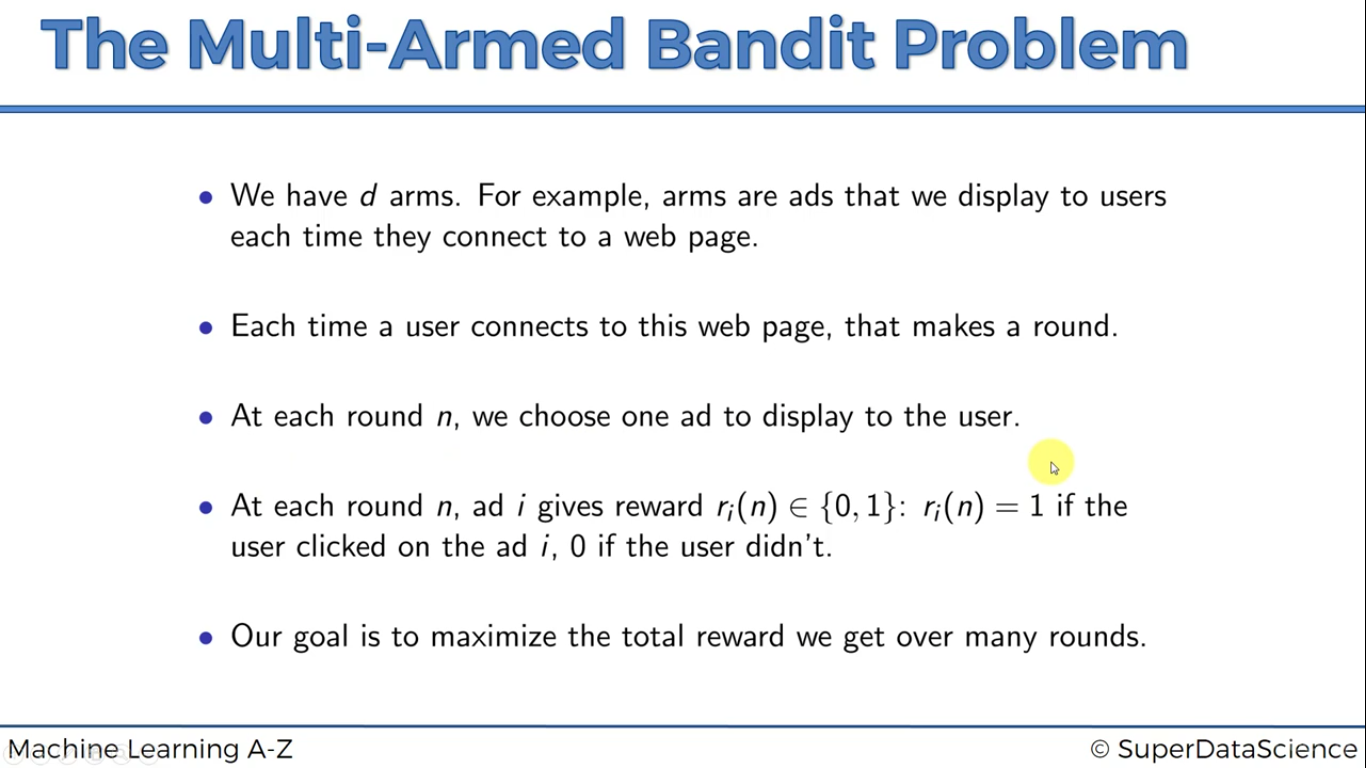

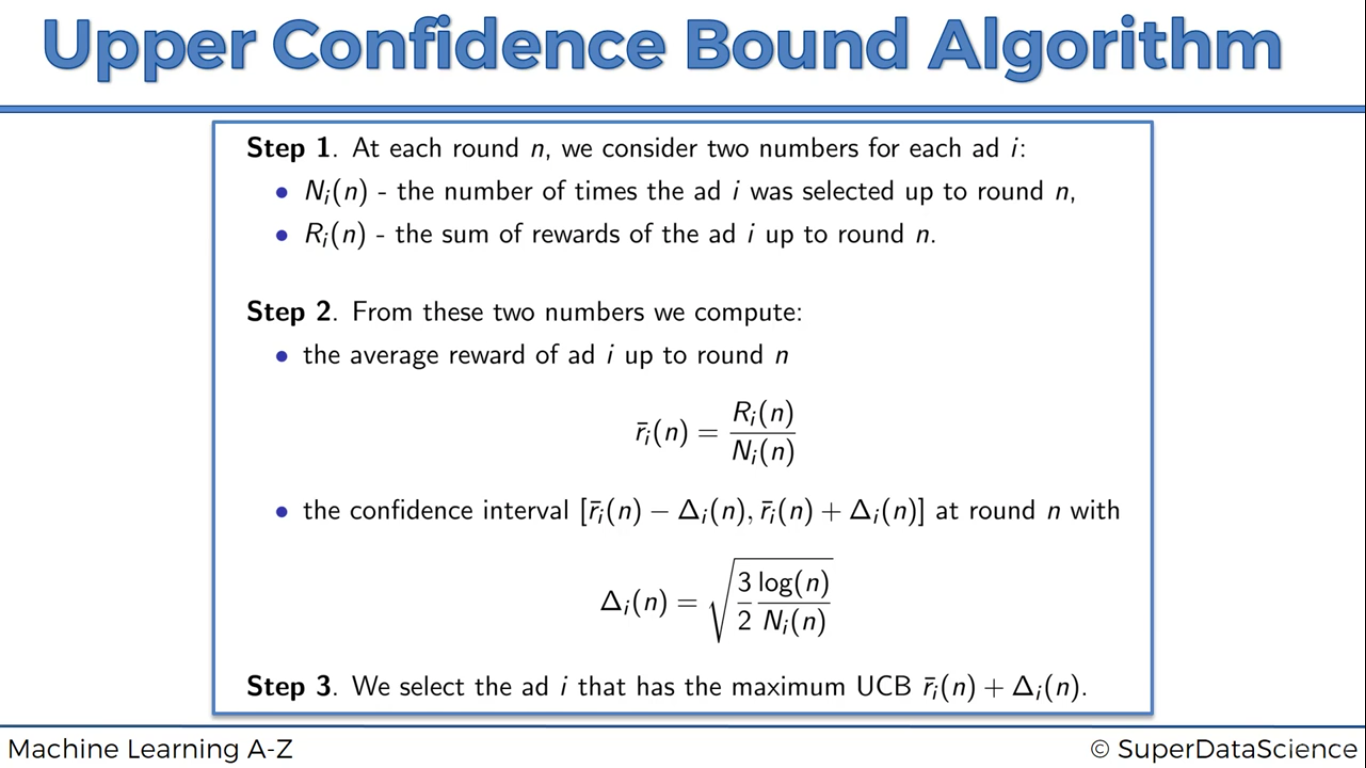

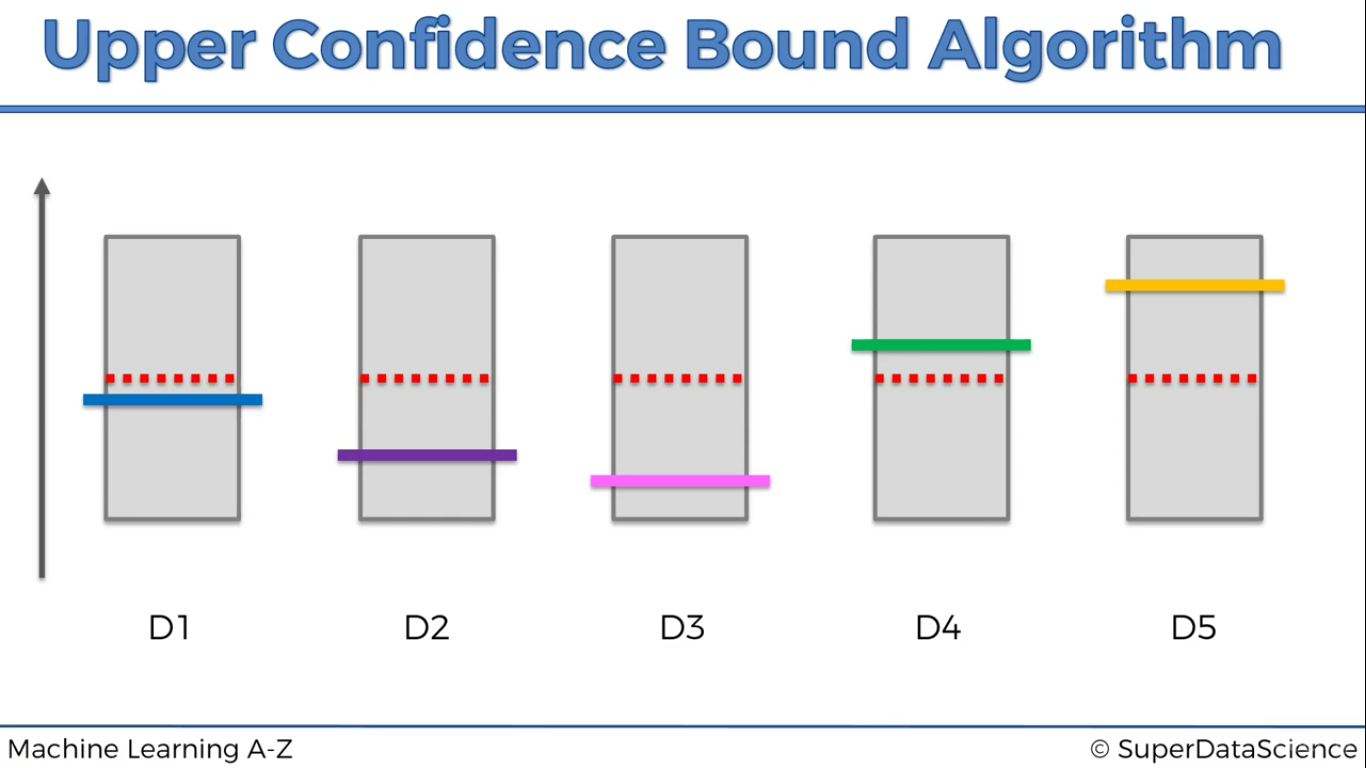

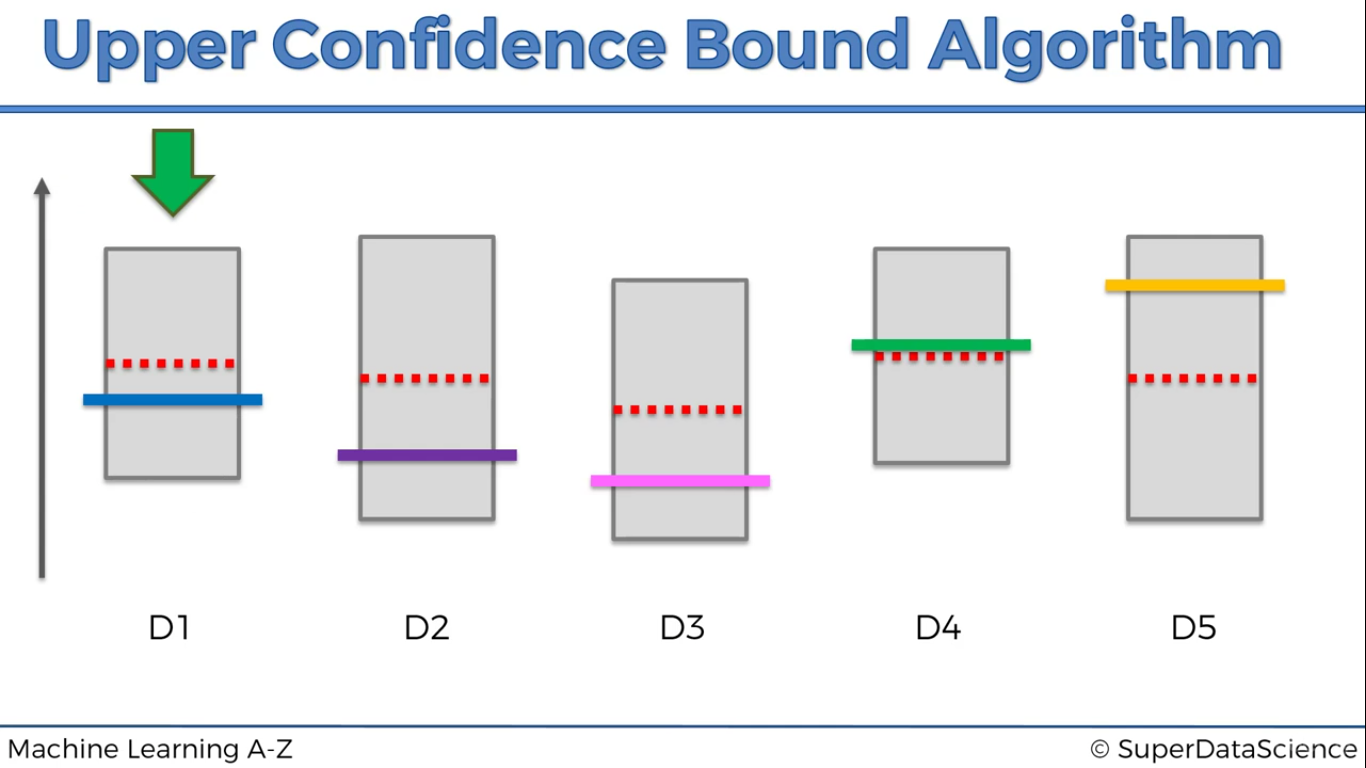

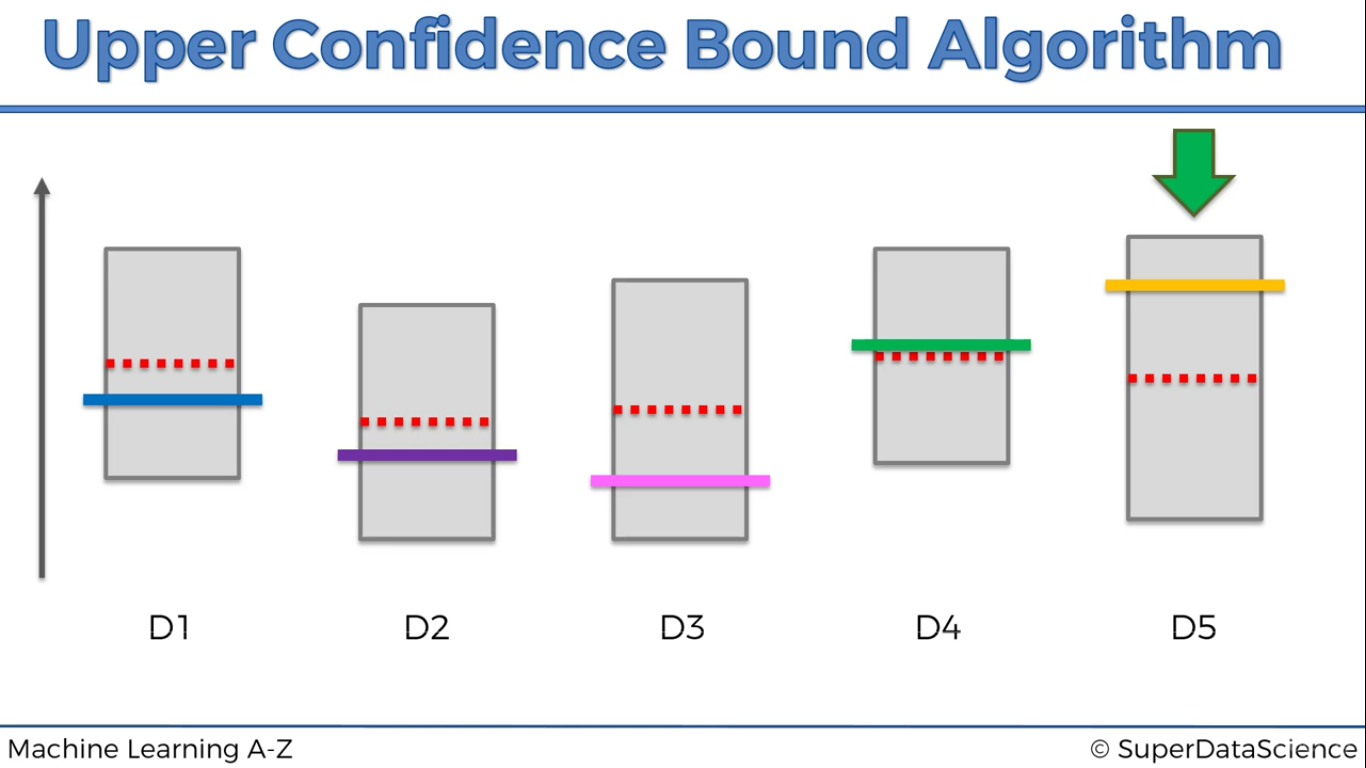

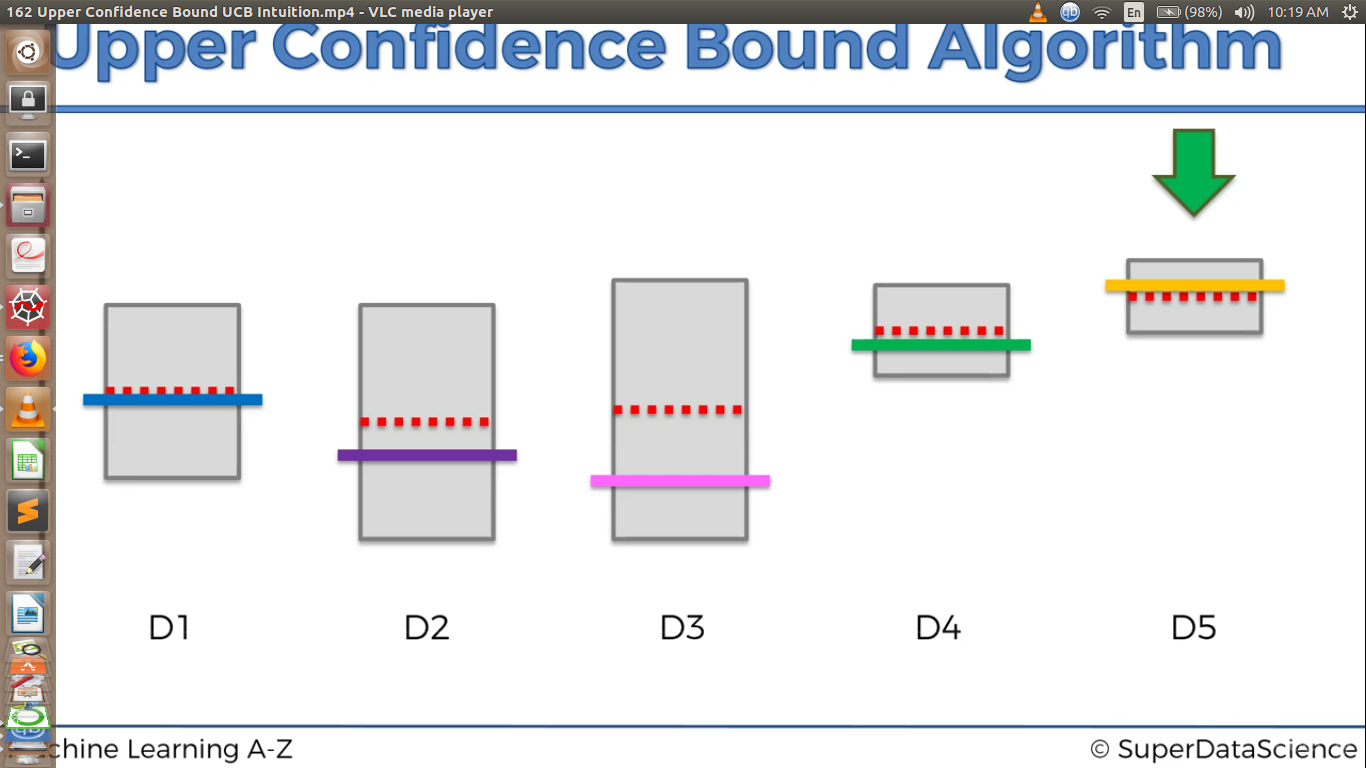


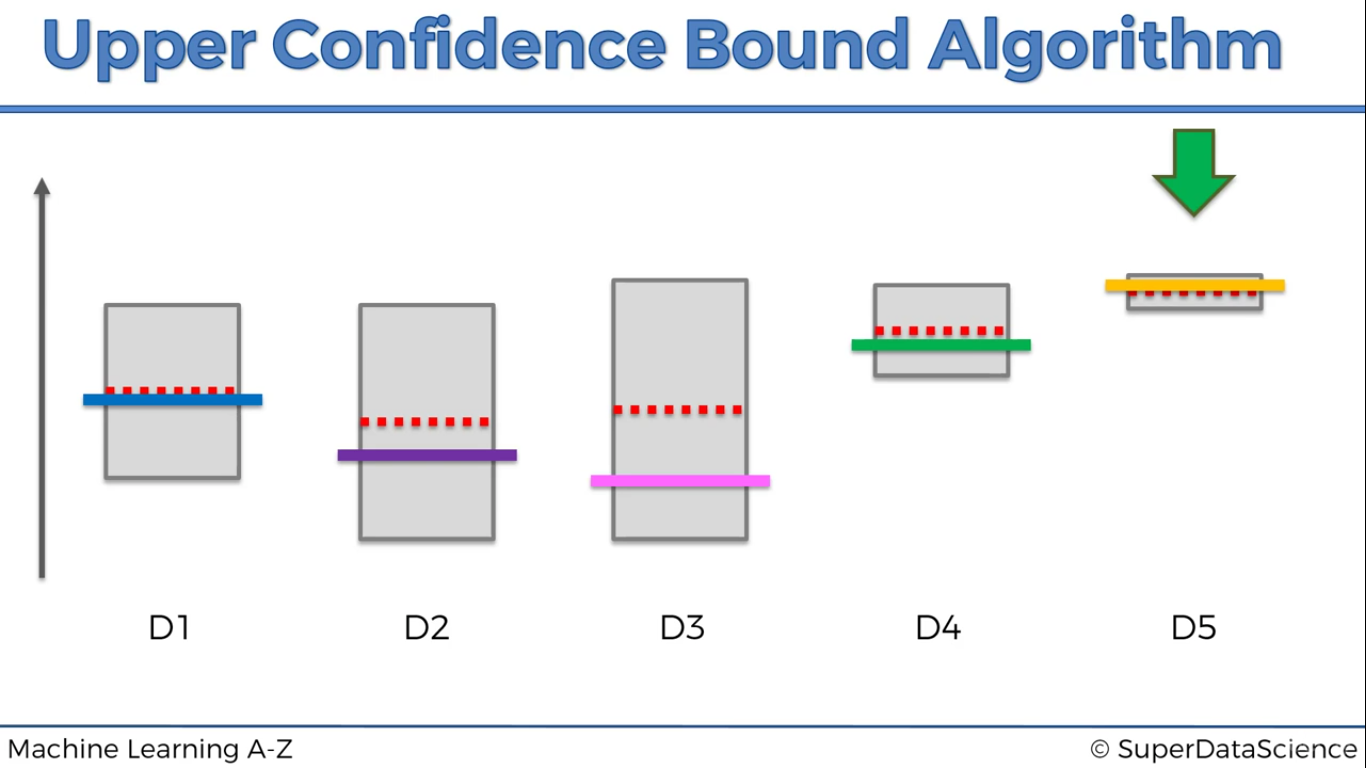

## We use the UCB to optimize CTR(Click through rate) for ads that we put on social network.

Here we have the dataset, has the car advertisement campaign, the ad has different versions. 10 versions of great ads. We need to find the best strategy to find the best version of ads to get best CTR. <b>We don't have the dataset we have the similation version that's it. that is how it is different than what we have been doing. We place one version of the ad, and see if there is a click for +ve--->reward +1 and for -ve ---> reward 0. So the final result will depend on all the previous results which means we will be able to find the one with best distribution on the fly.<i>That is why Reinforcement learning is also called online learning or dynamic learning.</i></b>
<p>
so we comeup with a strategy to show an ad to a user based on his previous responses.

1. At first we start by showing user a totally random version.

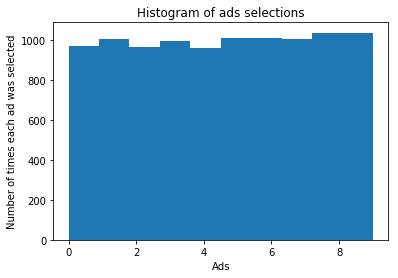

In [2]:
#Upper confidene bound

#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

#Implementing Random selection

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

#visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show() 

`2. Now we implement the UCB`

step 1. number of times ad 'i' was selected upto round n.(number_of_selections) and sums_of_rewards 0 vectors.
step 2 we find the average_reward and upper_bound. if upper_bound is mmore than max_upper_bound, it set to the value of upper_bound.

Here for the first 10 ads we need same values, thus to do that we use upper_bound = 1e400(i.e.10^400) for it in every loop so that for the first 10 round each ad is selected and has the max_upper_bound same where we start the algo.
 

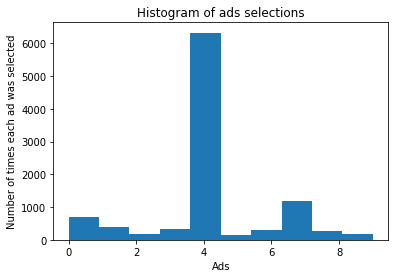

In [3]:
# UCB

#importing the libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

#Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
#for each version of ad average reward and confidence interval
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (number_of_selections[i]>0):
            average_reward = sums_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward+delta_i
        else: 
            upper_bound = 1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward += reward
    

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show() 
        
    